# Aplicando k-Means no Iris dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets, cluster, metrics
import seaborn as sns
%matplotlib inline

In [2]:
iris = datasets.load_iris()

Estimadores possuem um método `fit_predict`, equivalente a `fit(X, y).predict(X, y)`, sem o `y` no caso não supervisionado:

In [3]:
results = {k: cluster.KMeans(k, random_state=42).fit_predict(iris.data) for k in [3, 2, 4, 6]}
results

{2: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32),
 3: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
        2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
        2, 0, 2, 2, 2, 2, 0, 

É possível que, para outros valores de `random_state`, os resultados do k-Means fossem outros para esses mesmos valores de $k$. Porém, na continuidade, esses resultados obtidos serão avaliados.

# $k = 3$

A classificação não ficou exata, há mais elementos de uma classe do que de outra (o ideal seria 50 em todas as classes):

In [4]:
np.bincount(results[3])

array([62, 50, 38])

Comparemos as classes encontradas pelo k-Means às fornecidas como parte dos dados, onde estão as diferenças?

In [5]:
metrics.confusion_matrix(iris.target, np.array([1, 0, 2])[results[3]])

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]])

In [6]:
1 - 16 / 150 # Acurácia

0.8933333333333333

A classificação não-supervisionada de todos os dados cometeu $16$ erros em $150$, dessa forma a acurácia ficou abaixo de $90\%$. Vamos ver onde esses erros estão!

In [7]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)

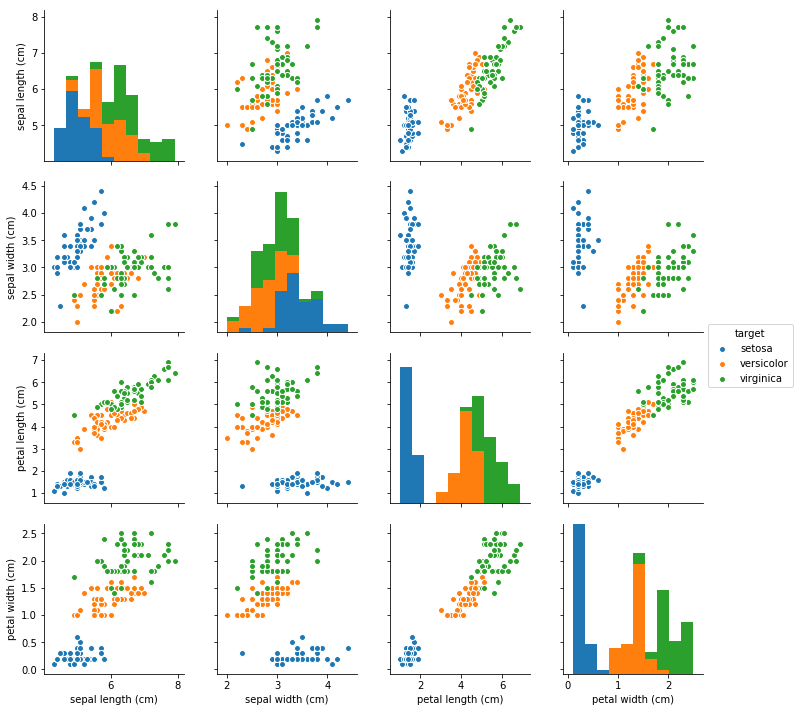

In [8]:
sns.pairplot(X.assign(target=iris.target_names[iris.target]),
             hue="target",
             x_vars=X.columns, y_vars=X.columns);

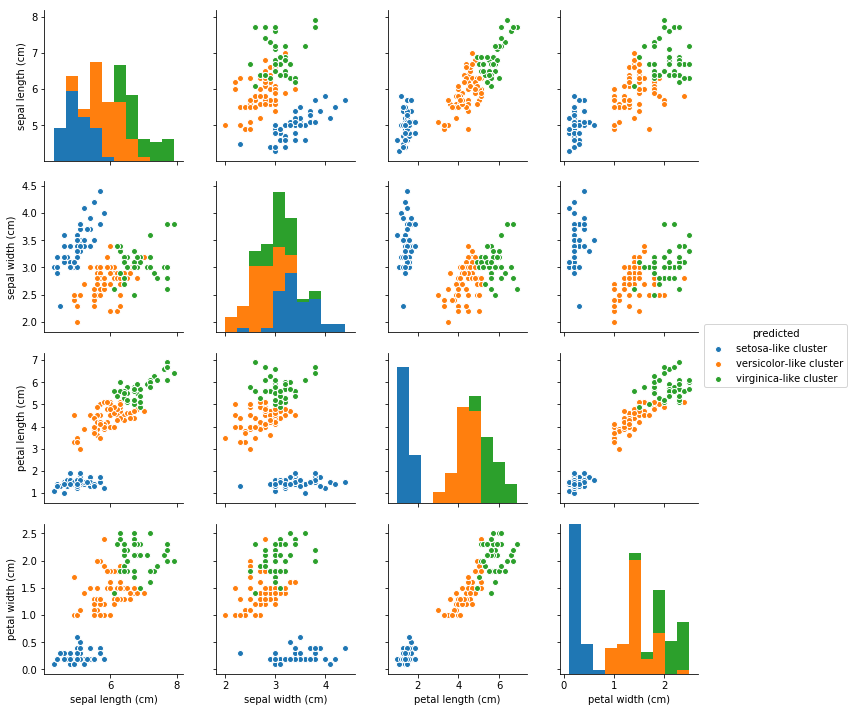

In [9]:
sns.pairplot(X.assign(predicted=np.array(["versicolor-like cluster",
                                          "setosa-like cluster",
                                          "virginica-like cluster"])[results[3]]),
             hue="predicted",
             x_vars=X.columns, y_vars=X.columns);

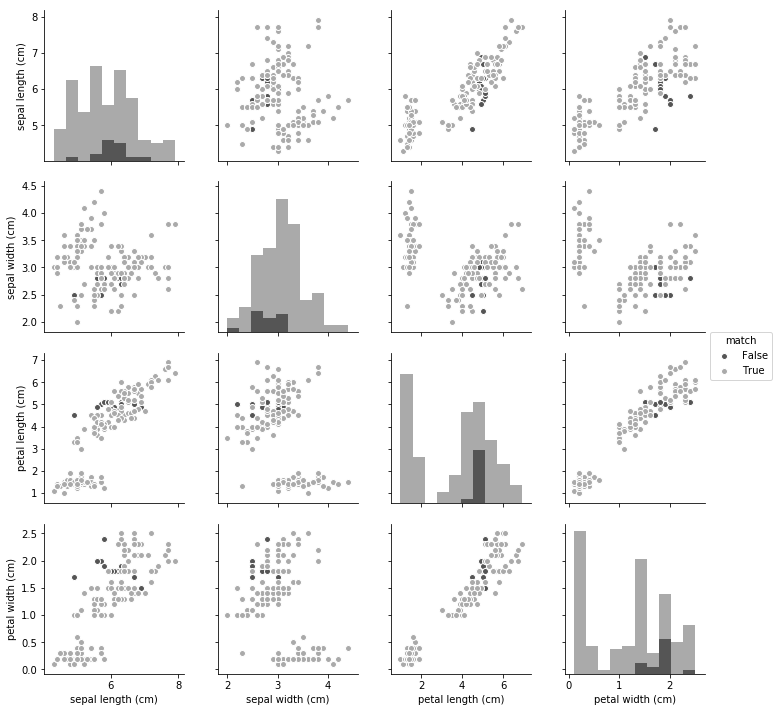

In [10]:
sns.pairplot(X.assign(match=np.array([1, 0, 2])[results[3]] == iris.target),
             hue="match",
             palette="binary_r",
             x_vars=X.columns, y_vars=X.columns);

Todos na fronteira entre *I. versicolor* e *I. virginica*!

# $k = 2$

Para $2$ classes, a separação do k-Means quase agrupou *I. versicolor* e *I. virginica* em uma única classe:

In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
# Iris setosa está inteira em uma única classe!
set(results[2][np.where(iris.target == 0)])

{1}

In [13]:
# Todas as Iris virginica estão na outra classe!
set(results[2][np.where(iris.target == 2)])

{0}

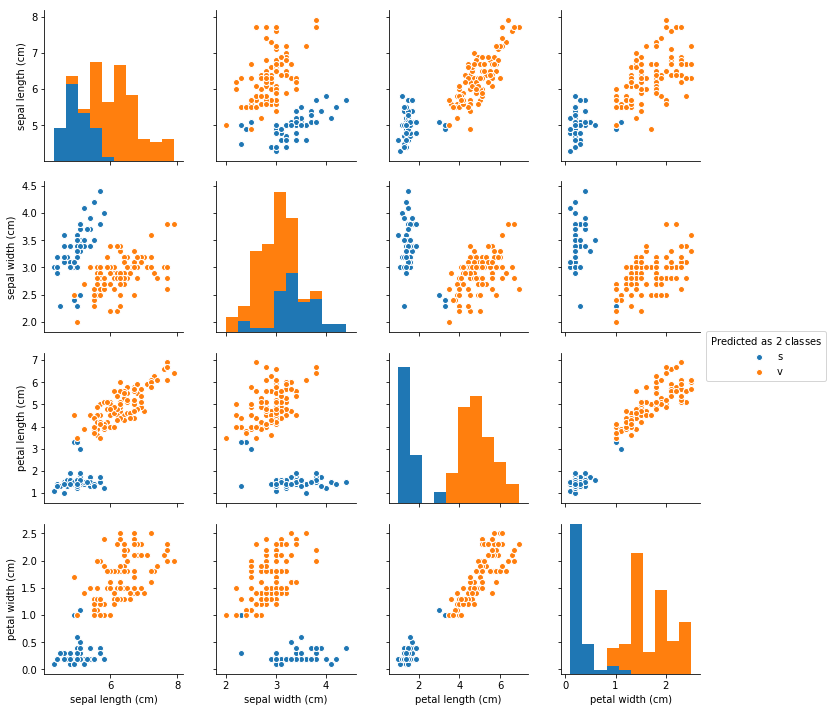

In [14]:
sns.pairplot(X.assign(**{"Predicted as $2$ classes": np.array(["v", "s"])[results[2]]}),
             hue="Predicted as $2$ classes",
             x_vars=X.columns, y_vars=X.columns);

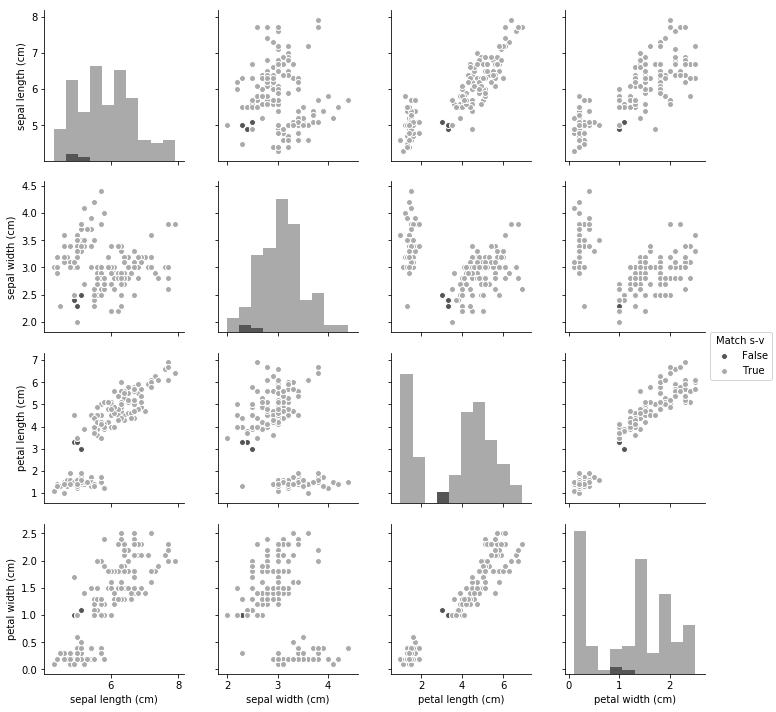

In [15]:
sns.pairplot(X.assign(**{"Match s-v": (results[2] == 1) == (iris.target == 0)}),
             hue="Match s-v",
             palette="binary_r",
             x_vars=X.columns, y_vars=X.columns);

Com essa interpretação, podemos "forjar" uma matriz de erro/confusão:

In [16]:
metrics.confusion_matrix(iris.target != 0, results[2] != 1)

array([[50,  0],
       [ 3, 97]])

Nesse caso, há apenas $3$ erros: *Iris versicolor* classificadas como *Iris setosa*.

# $k = 4$

In [17]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Para $4$ classes, a separação do k-Means basicamente dividiu a união de *I. versicolor* e *I. virginica* em $3$ classes:

In [18]:
# Iris setosa continua inteira em uma única classe, e não há nada além da setosa nessa classe!
set(results[4][np.where(iris.target == 0)]) # Setosa

{0}

In [19]:
set(results[4][np.where(iris.target == 1)]) # Versicolor

{1, 3}

In [20]:
set(results[4][np.where(iris.target == 2)]) # Virginica está nas 3 classes!

{1, 2, 3}

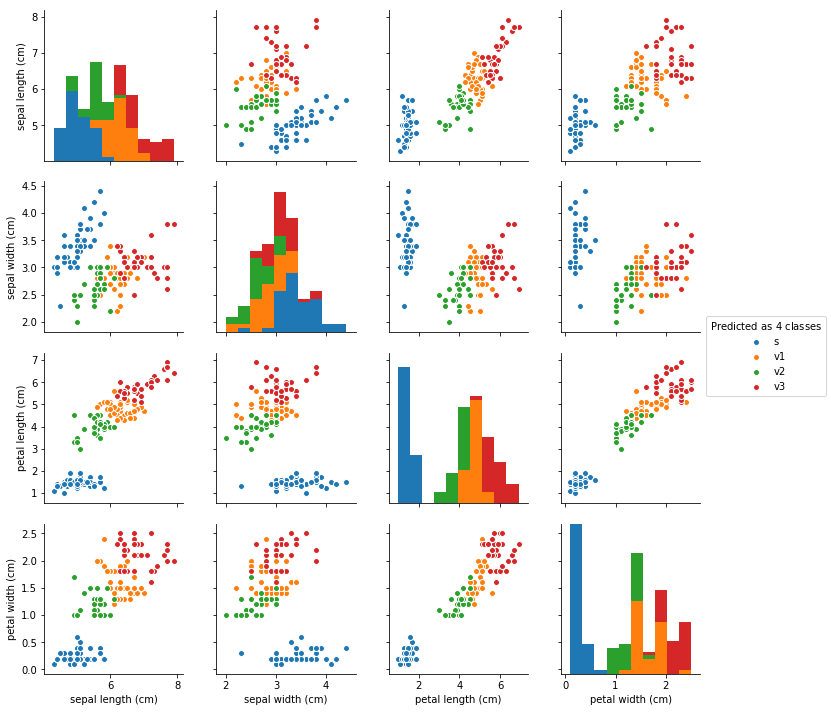

In [21]:
sns.pairplot(X.assign(**{"Predicted as $4$ classes": np.array(["s", "v1", "v3", "v2"])[results[4]]}),
             hue="Predicted as $4$ classes",
             x_vars=X.columns, y_vars=X.columns);

# $k = 6$

A *Iris Setosa* teve sua classe dividida em duas!

In [22]:
{iris.target_names[c]: set(results[6][np.where(iris.target == c)]) for c in [0, 1, 2]}

{'setosa': {1, 5}, 'versicolor': {2, 3}, 'virginica': {0, 2, 3, 4}}

Isso permite um mapeamento:

|Índice da classe obtida pelo k-Means com $k=6$|Classes de Iris presentes|
|-|-|
|$0$|*Iris virginica*|
|$1$|*Iris setosa*|
|$2$|*Iris versicolor* (+ *Iris virginica* residual)|
|$3$|*Iris versicolor* (+ *Iris virginica* residual)|
|$4$|*Iris virginica*|
|$5$|*Iris setosa*|

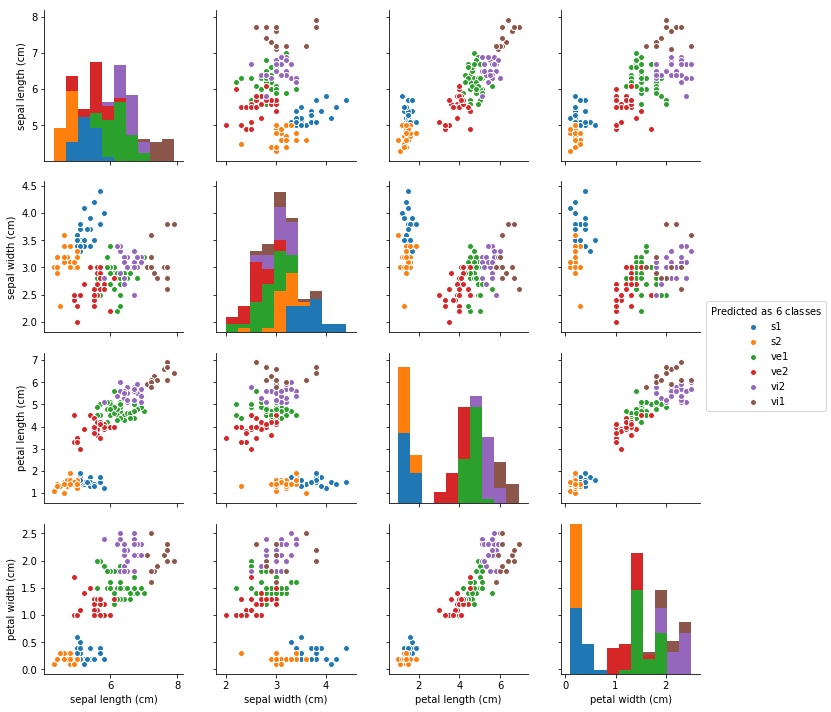

In [23]:
sns.pairplot(X.assign(**{"Predicted as $6$ classes": np.array(["vi1", "s2", "ve2", "ve1", "vi2", "s1"])[results[6]]}),
             hue="Predicted as $6$ classes",
             x_vars=X.columns, y_vars=X.columns);

Agrupando manualmente os pares, obtemos:

In [24]:
results_6_2 = np.array([2, 0, 1, 1, 2, 0])[results[6]]

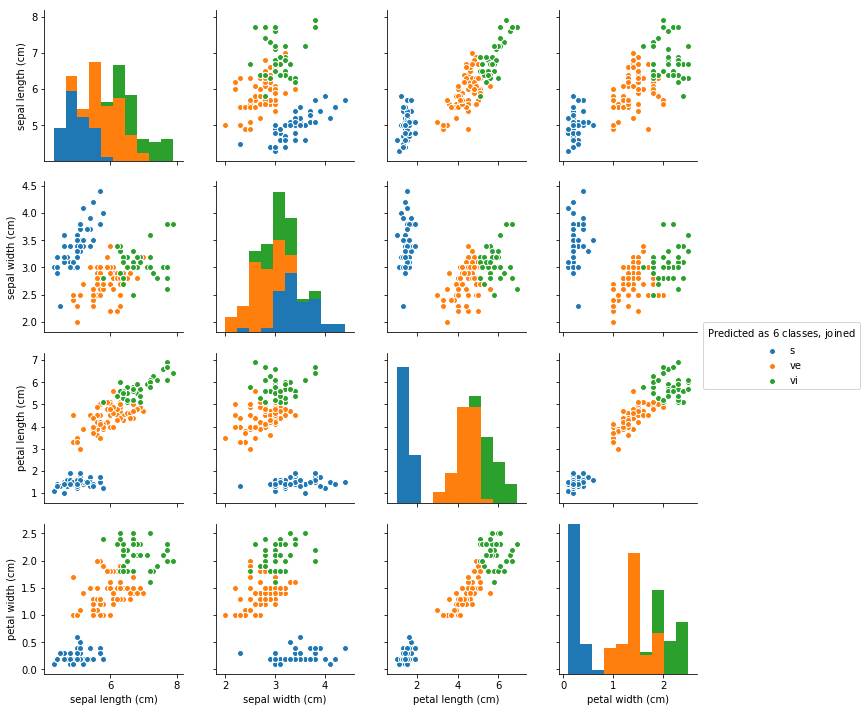

In [25]:
sns.pairplot(X.assign(**{"Predicted as $6$ classes, joined": np.array(["s", "ve", "vi"])[results_6_2]}),
             hue="Predicted as $6$ classes, joined",
             x_vars=X.columns, y_vars=X.columns);

Parece razoável! Mas a divisão ficou mais desequilibrada que a obtida com $k=3$:

In [26]:
np.bincount(results_6_2)

array([50, 64, 36])

Por outro lado, esse resultado teve mais coincidências com os dados conhecidos na divisão entre *I. versicolor* e *I. virginica*, e uma acurácia acima de $90\%$:

In [27]:
metrics.confusion_matrix(iris.target, results_6_2)

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0, 14, 36]])

In [28]:
1 - 14 / 150 # Acurácia

0.9066666666666666

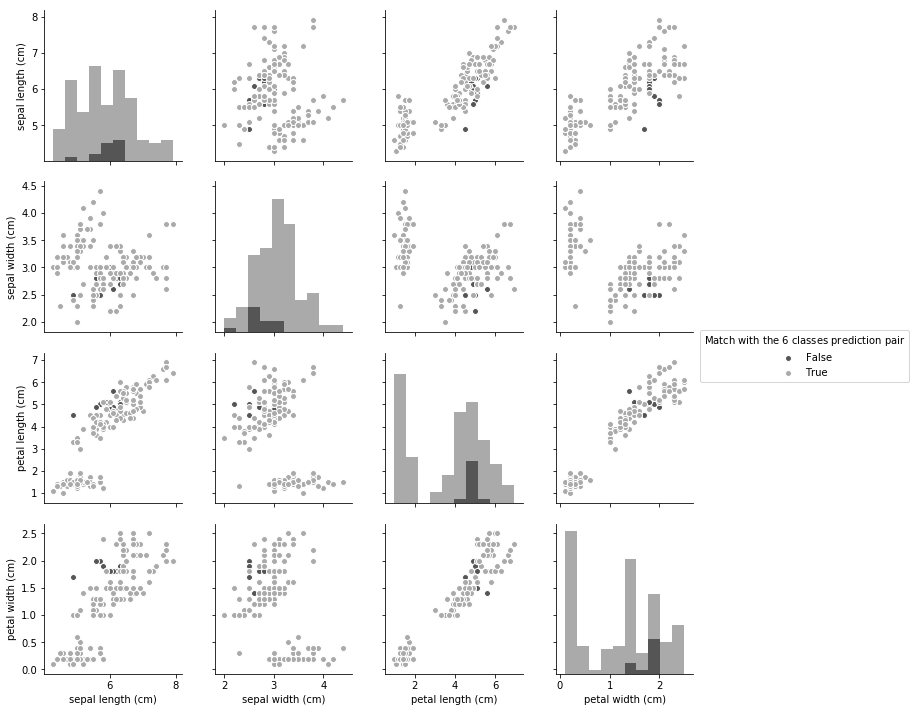

In [29]:
name_6_2 = "Match with the $6$ classes prediction pair"
sns.pairplot(X.assign(**{name_6_2: results_6_2 == iris.target}),
             hue=name_6_2,
             palette="binary_r",
             x_vars=X.columns, y_vars=X.columns);

Embora o erro seja pequeno, ele é sempre o mesmo: são $14$ espécies de $Iris virginica$ que foram classificadas como $Iris versicolor$. Porém, essa é uma interpretação do resultado do k-Means, não podemos esquecer que as classes não serviram de entrada para a obtenção dos centróides que dividem os dados em $k$ classes.